In [ ]:
# https://towardsdatascience.com/understanding-audio-data-fourier-transform-fft-spectrogram-and-speech-recognition-a4072d228520


In [20]:
import librosa
import numpy as np

In [2]:
samples, sample_rate = librosa.load('sample1m.wav')

In [3]:
dur = len(samples) / sample_rate
print(f'{dur} seconds')

33.529659863945575 seconds


In [5]:
from IPython.display import Audio
Audio('sample1m.wav')

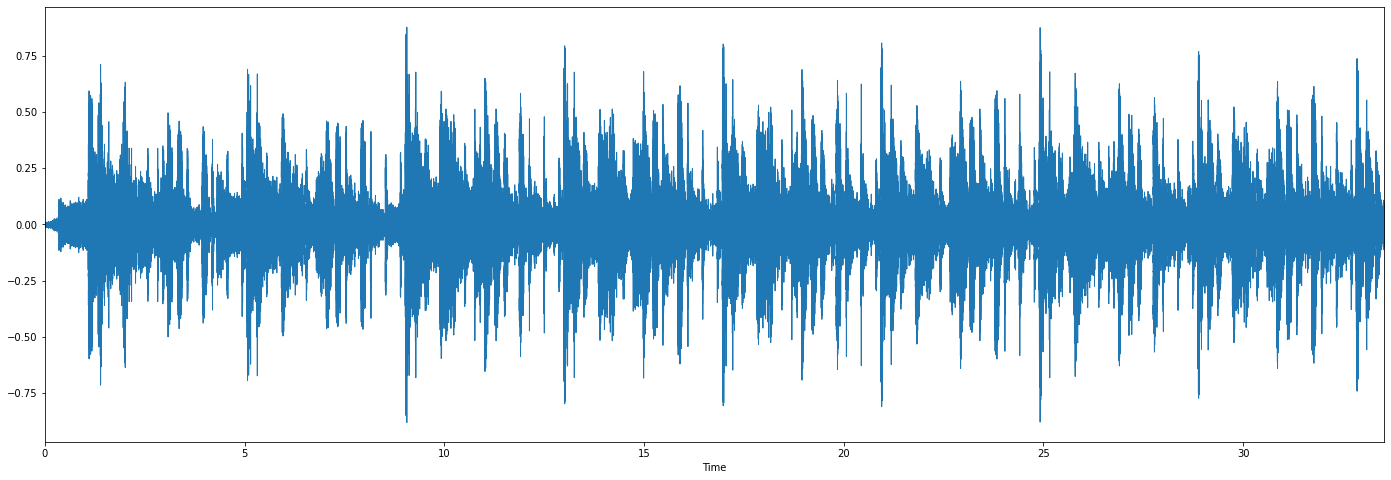

In [17]:
# Visualizing
import matplotlib.pyplot as plt
from librosa import display
plt.figure(figsize=(24,8))
librosa.display.waveplot(y = samples, sr = sample_rate)
plt.show()

In [18]:
import scipy

def fft_plot(audio, sampling_rate):
    n = len(audio)
    T = 1 / sampling_rate
    yf = scipy.fft(audio)
    xf = np.linspace(0.0, 1.0/(2.0*T), n/2)
    fig, ax = plt.subplots()
    ax.plot(xf, 2.0/n*np.abs(yf[:n//2]))
    plt.grid()
    plt.xlabel('freq ==>')
    plt.ylabel("magnitude")
    return plt.show()


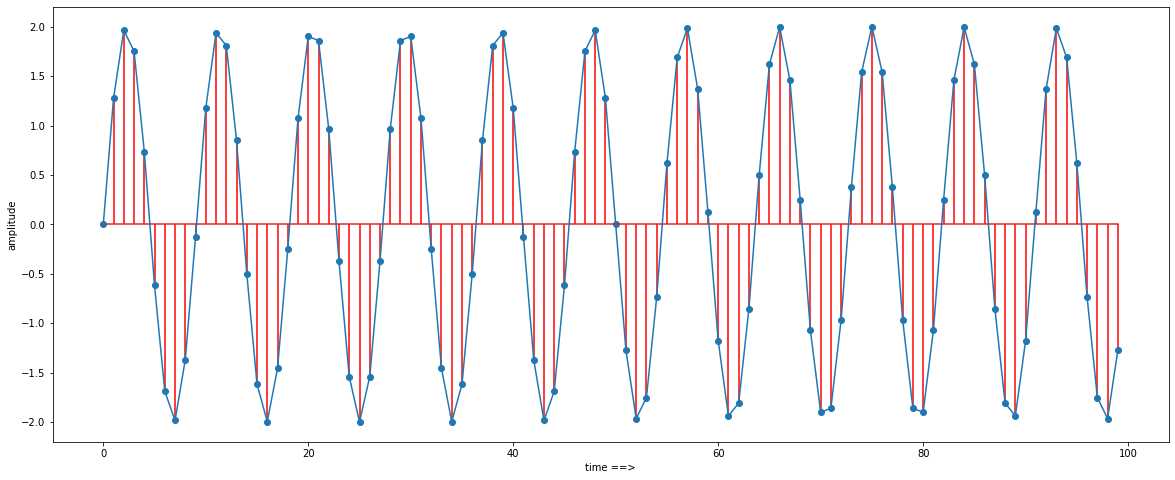

In [23]:
samples = 100
f = 11
x = np.arange(samples)
y2 = 2 * np.sin(2*np.pi*f *(x/samples))
plt.figure(figsize=(20,8))
plt.stem(x,y2,'r',)
plt.plot(x,y2)
plt.xlabel("time ==>")
plt.ylabel("amplitude")
plt.show()

In [24]:
def spectrogram(samples, sample_rate, stride_ms = 10.0, 
                          window_ms = 20.0, max_freq = None, eps = 1e-14):

    stride_size = int(0.001 * sample_rate * stride_ms)
    window_size = int(0.001 * sample_rate * window_ms)

    # Extract strided windows
    truncate_size = (len(samples) - window_size) % stride_size
    samples = samples[:len(samples) - truncate_size]
    nshape = (window_size, (len(samples) - window_size) // stride_size + 1)
    nstrides = (samples.strides[0], samples.strides[0] * stride_size)
    windows = np.lib.stride_tricks.as_strided(samples, 
                                          shape = nshape, strides = nstrides)
    
    assert np.all(windows[:, 1] == samples[stride_size:(stride_size + window_size)])

    # Window weighting, squared Fast Fourier Transform (fft), scaling
    weighting = np.hanning(window_size)[:, None]
    
    fft = np.fft.rfft(windows * weighting, axis=0)
    fft = np.absolute(fft)
    fft = fft**2
    
    scale = np.sum(weighting**2) * sample_rate
    fft[1:-1, :] *= (2.0 / scale)
    fft[(0, -1), :] /= scale
    
    # Prepare fft frequency list
    freqs = float(sample_rate) / window_size * np.arange(fft.shape[0])
    
    # Compute spectrogram feature
    ind = np.where(freqs <= max_freq)[0][-1] + 1
    specgram = np.log(fft[:ind, :] + eps)
    return specgram

In [27]:
samples, sampling_rate = librosa.load('sample1m.wav')
spectro = spectrogram(samples, sampling_rate, 10.0, 20.0, 3000)

In [31]:
!curl https://www2.cs.uic.edu/~i101/SoundFiles/CantinaBand3.wav --output cantina.wav

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  129k  100  129k    0     0  71306      0  0:00:01  0:00:01 --:--:-- 71306


In [33]:
from IPython.display import Audio
Audio('cantina.wav')

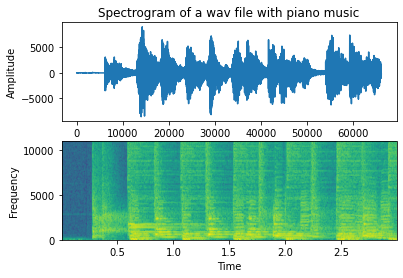

In [32]:

#import the pyplot and wavfile modules 

import matplotlib.pyplot as plot

from scipy.io import wavfile

 

# Read the wav file (mono)

samplingFrequency, signalData = wavfile.read('cantina.wav')

 

# Plot the signal read from wav file

plot.subplot(211)

plot.title('Spectrogram of a wav file with piano music')

 

plot.plot(signalData)

plot.xlabel('Sample')

plot.ylabel('Amplitude')

 

plot.subplot(212)

plot.specgram(signalData,Fs=samplingFrequency)

plot.xlabel('Time')

plot.ylabel('Frequency')

 

plot.show()

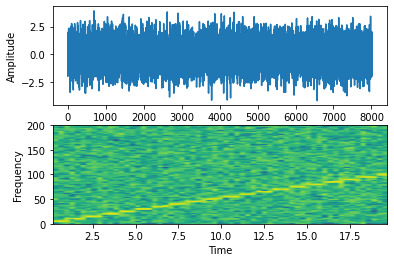

In [30]:
# import the libraries

import matplotlib.pyplot as plot

import numpy as np

 

# Define the list of frequencies

frequencies         = np.arange(5,105,5)

 

# Sampling Frequency

samplingFrequency   = 400

 

# Create two ndarrays

s1 = np.empty([0]) # For samples

s2 = np.empty([0]) # For signal

 

# Start Value of the sample

start   = 1

 

# Stop Value of the sample

stop    = samplingFrequency+1

 

for frequency in frequencies:

    sub1 = np.arange(start, stop, 1)

 

    # Signal - Sine wave with varying frequency + Noise

    sub2 = np.sin(2*np.pi*sub1*frequency*1/samplingFrequency)+np.random.randn(len(sub1))

  

    s1      = np.append(s1, sub1)

    s2      = np.append(s2, sub2)

   

    start   = stop+1

    stop    = start+samplingFrequency

 

# Plot the signal

plot.subplot(211)

plot.plot(s1,s2)

plot.xlabel('Sample')

plot.ylabel('Amplitude')

 

 

# Plot the spectrogram

plot.subplot(212)

powerSpectrum, freqenciesFound, time, imageAxis = plot.specgram(s2, Fs=samplingFrequency)

plot.xlabel('Time')

plot.ylabel('Frequency')

 

plot.show()   